(253680, 22)


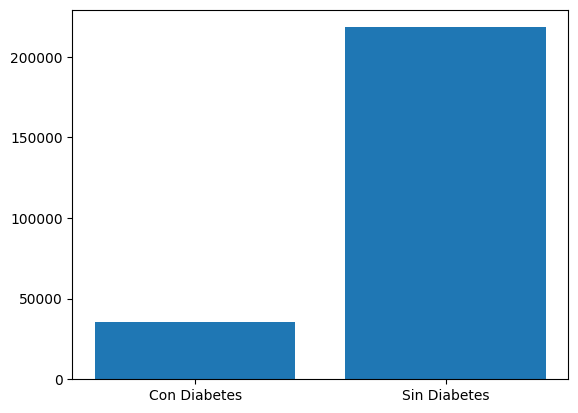

[np.int64(5700), np.int64(7598), np.int64(11123), np.int64(13823), np.int64(16157), np.int64(19819), np.int64(26314), np.int64(30832), np.int64(33244), np.int64(32194), np.int64(23533), np.int64(15980), np.int64(17363)]


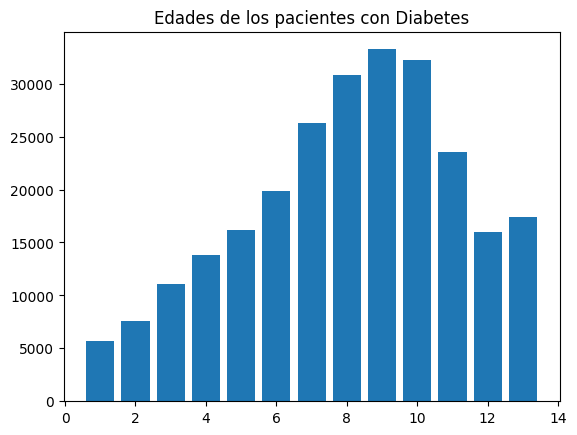

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
archivo3 = "diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(archivo3)
#df.head()

df.select_dtypes(include=[float,int]).corr()

#df.info()

#df.isnull().sum()
print(df.shape)
#df.describe()


df['Diabetes_binary']
df_diabetes = df[ df['Diabetes_binary'] == 1 ]['Diabetes_binary'].count()
df_sin_diabetes = df[ df['Diabetes_binary'] == 0 ]['Diabetes_binary'].count()


# Crear el gráfico
plt.bar(["Con Diabetes","Sin Diabetes"],[df_diabetes, df_sin_diabetes])

# Mostrar el gráfico
plt.show()


edades = []
for x in range(13):
    edades.append(df[ df["Age"] == x+1]["Age"].count())

print(edades)

plt.title("Edades de los pacientes con Diabetes")
plt.bar(range(1,14) , edades)
plt.show()


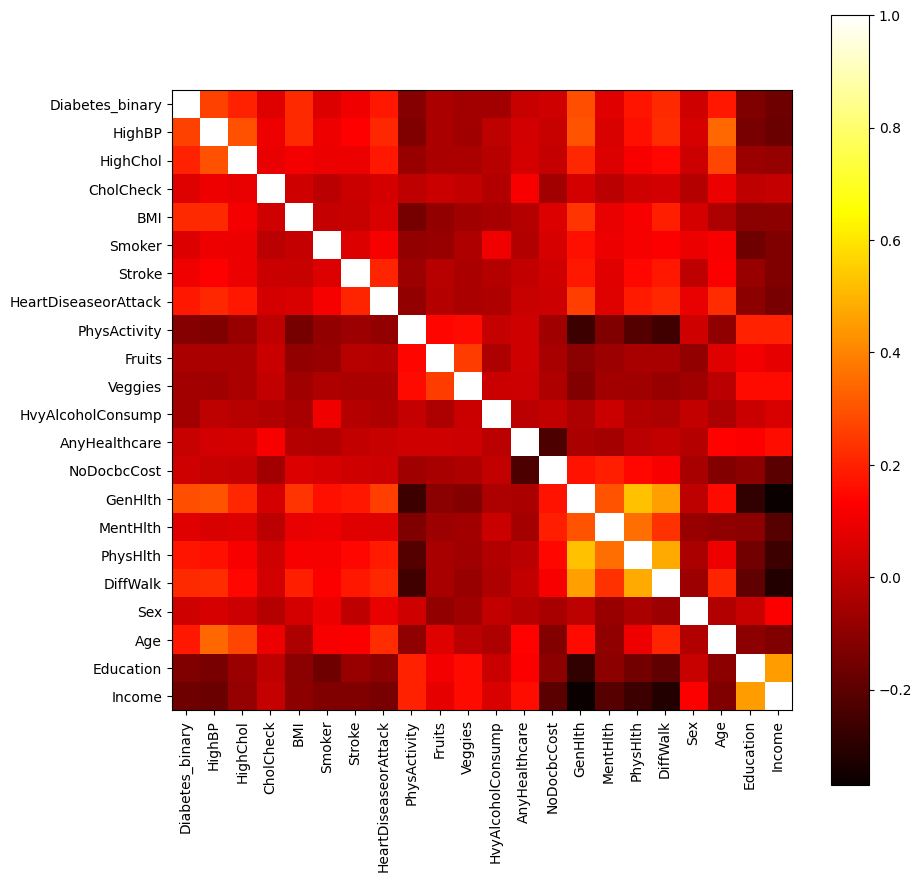

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

archivo3 = "diabetes_binary_health_indicators_BRFSS2015.csv"

df = pd.read_csv(archivo3)

## aqui lo admito le copie el codigo a fabia xd
correlacion = df.corr()
numero_de_columnas = len(correlacion)
correlacion.style.background_gradient(cmap='coolwarn')

x = range(numero_de_columnas)
y = correlacion.columns

plt.imshow(correlacion, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(x, y, rotation='vertical')
plt.yticks(x, y)
plt.gcf().set_size_inches(10, 10)




# Con esto grafico quiero saber que datos esta relacionados

¿Me gustaria saber si el que una persona sea fumador esta?

[np.int64(174), np.int64(4043), np.int64(9478), np.int64(62750), np.int64(69910), np.int64(107325)]
[np.int64(9811), np.int64(11783), np.int64(15994), np.int64(20135), np.int64(25883), np.int64(36470), np.int64(43219), np.int64(90385)]


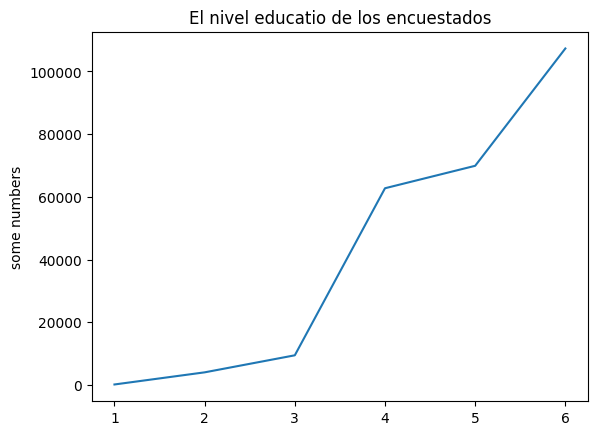

<BarContainer object of 12 artists>

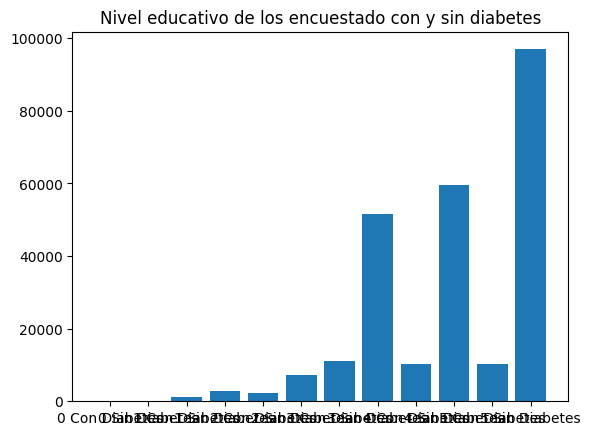

In [48]:

educ = []

for x in range(6):
    educ.append(df[ df["Education"] == x+1]["Education"].count())

print(educ)

Income = []

for x in range(8):
    Income.append(df[ df["Income"] == x+1]["Income"].count())

print(Income)

maximo = max(*educ, *Income)

maximo

plt.title("El nivel educatio de los encuestados")
plt.plot(range(1,7),educ)
plt.ylabel('some numbers')
plt.show()


names_educ_diabetes = []
educ_diabetes = []
for x in range(6):
    #educ_diabetes.append(df[ df["Diabetes_binary"] == 1][df["Education"]==x+1]["Education"].count())
    educ_diabetes.append(df.query("Diabetes_binary == 1 and Education == {}+1".format(x))["Education"].count())
    educ_diabetes.append(df.query("Diabetes_binary == 0 and Education == {}+1".format(x))["Education"].count())
    names_educ_diabetes.append("{} Con Diabetes".format(x))
    names_educ_diabetes.append("{} Sin Diabetes".format(x))

plt.title("Nivel educativo de los encuestado con y sin diabetes")
plt.bar(names_educ_diabetes, educ_diabetes)



A la conclusión De qué nivel educativoNo tiene ninguna relación con el paciente pueda desarrollar diabetes

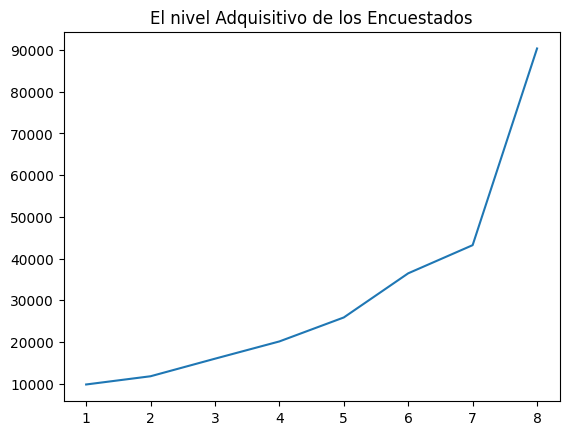

<BarContainer object of 16 artists>

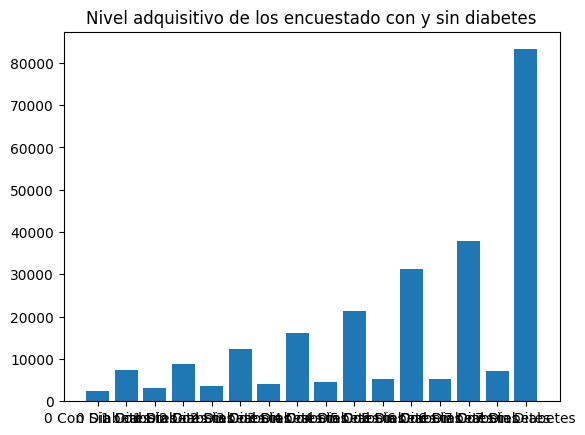

In [49]:
plt.title("El nivel Adquisitivo de los Encuestados")
plt.plot(range(1,9),Income)
plt.show()

names_inco_diabetes = []
inco_diabetes = []
for x in range(8):
    #inco_diabetes.append(df[ df["Diabetes_binary"] == 1][df["incoation"]==x+1]["incoation"].count())
    inco_diabetes.append(df.query("Diabetes_binary == 1 and Income == {}+1".format(x))["Income"].count())
    inco_diabetes.append(df.query("Diabetes_binary == 0 and Income == {}+1".format(x))["Income"].count())
    names_inco_diabetes.append("{} Con Diabetes".format(x))
    names_inco_diabetes.append("{} Sin Diabetes".format(x))

plt.title("Nivel adquisitivo de los encuestado con y sin diabetes")
plt.bar(names_inco_diabetes, inco_diabetes)


Con esto llego a la otra conclusión de que nivel adquisitivo tampoco tiene nada que ver con que un paciente pueda o no tener diabetes

Quiero ver cuál de los 2 sexos tiene más diabetes si es que los hombres tiene más diabetes o las mujeres tienen más. ¿Qué pasa?. Qué si mis datos hay más mujeres que hombres o Hombres que mujeres, entonces mis datos ya están errados, así que primero voy a comprobar eso.

man -> 111706 
woman -> 141974 
La diferencia -> 30268


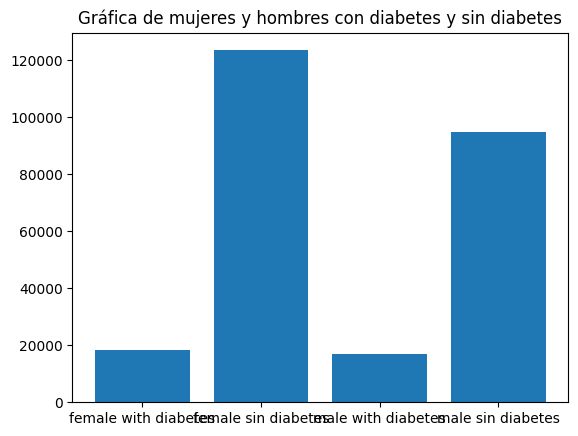

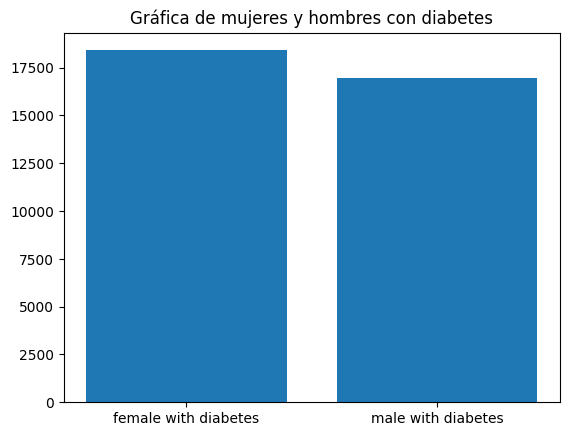

In [50]:
man = df.query("Sex==1")["Sex"].count()
woman = df.query("Sex==0")["Sex"].count()
print("man -> {} ".format(man))
print("woman -> {} ".format(woman))
print("La diferencia -> {}".format(woman - man))


sexo_diabetes = []
sexo_diabetes.append(df.query("Diabetes_binary == 1 and Sex == 0")["Sex"].count())
sexo_diabetes.append(df.query("Diabetes_binary == 0 and Sex == 0")["Sex"].count())
sexo_diabetes.append(df.query("Diabetes_binary == 1 and Sex == 1")["Sex"].count())
sexo_diabetes.append(df.query("Diabetes_binary == 0 and Sex == 1")["Sex"].count())


plt.title("Gráfica de mujeres y hombres con diabetes y sin diabetes")
plt.bar(["female with diabetes","female sin diabetes","male with diabetes","male sin diabetes" ], sexo_diabetes)
plt.show()

sexo_diabetes.clear()
sexo_diabetes.append(df.query("Diabetes_binary == 1 and Sex == 0")["Sex"].count())
sexo_diabetes.append(df.query("Diabetes_binary == 1 and Sex == 1")["Sex"].count())
plt.title("Gráfica de mujeres y hombres con diabetes")
plt.bar(["female with diabetes","male with diabetes"], sexo_diabetes)
plt.show()

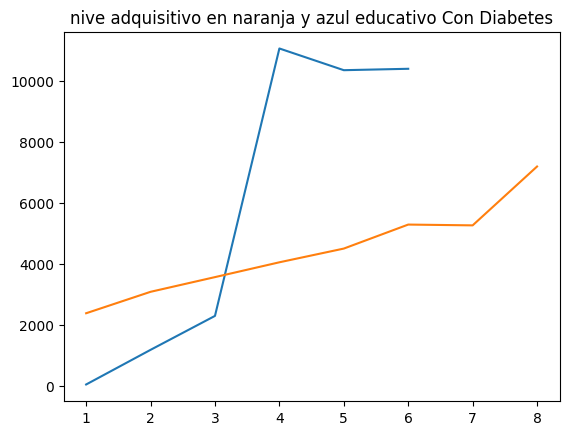

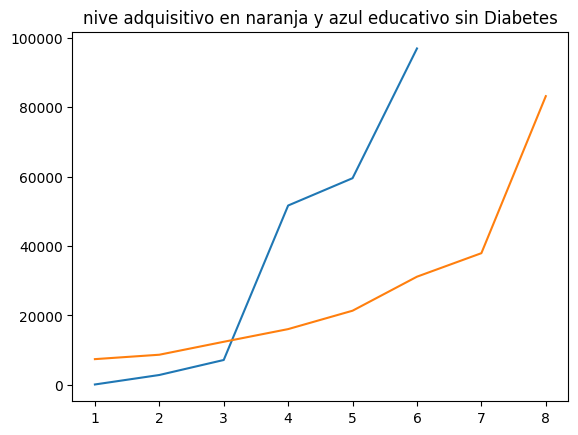

In [73]:
educ = []

for x in range(6):
    educ.append(df.query("Diabetes_binary ==1 and Education == {}+1".format(x))["Education"].count())


Income = []

for x in range(8):
    Income.append(df.query("Diabetes_binary ==1 and Income == {}+1".format(x))["Income"].count())



plt.title("")
plt.plot(range(1,7),educ) 

plt.title("nive adquisitivo en naranja y azul educativo Con Diabetes")
plt.plot(range(1,9),Income)
plt.show()


educ.clear()
Income.clear()

educ = []

for x in range(6):
    educ.append(df.query("Diabetes_binary ==0 and Education == {}+1".format(x))["Education"].count())


Income = []

for x in range(8):
    Income.append(df.query("Diabetes_binary ==0 and Income == {}+1".format(x))["Income"].count())

plt.title("")
plt.plot(range(1,7),educ)

plt.title("nive adquisitivo en naranja y azul educativo sin Diabetes")
plt.plot(range(1,9),Income)
plt.show()


[np.int64(127), np.int64(2860), np.int64(7182), np.int64(51684), np.int64(59556), np.int64(96925)]
[np.int64(7428), np.int64(8697), np.int64(12426), np.int64(16081), np.int64(21379), np.int64(31179), np.int64(37954), np.int64(83190)]


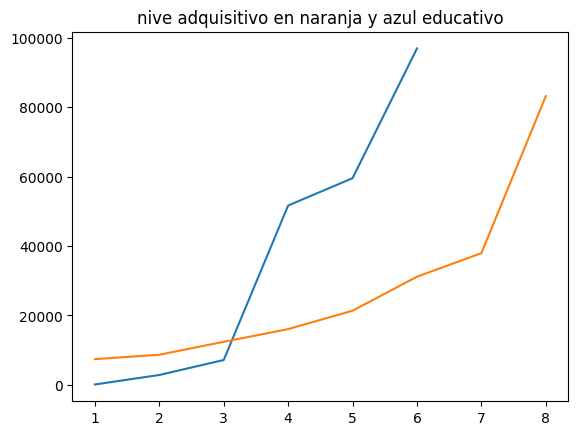

In [71]:
""" # Gráfico
fig, ax = plt.subplots()
ax.scatter(x = inco_diabetes, y = educ_diabetes)
plt.show() """


educ = []

for x in range(6):
    educ.append(df.query("Diabetes_binary ==0 and Education == {}+1".format(x))["Education"].count())

print(educ)

Income = []

for x in range(8):
    Income.append(df.query("Diabetes_binary ==0 and Income == {}+1".format(x))["Income"].count())

print(Income)

plt.title("")
plt.plot(range(1,7),educ)

plt.title("nive adquisitivo en naranja y azul educativo")
plt.plot(range(1,9),Income)
plt.show()

In [53]:
pd.crosstab(df["Income"], df["Education"])

Education,1.0,2.0,3.0,4.0,5.0,6.0
Income,,,,,,
1.0,37,900,1536,3594,2437,1307
2.0,25,741,1465,4692,3315,1545
3.0,28,740,1709,6511,4664,2342
4.0,18,605,1453,8029,6310,3720
5.0,22,478,1268,9046,8579,6490
6.0,18,293,921,10872,11996,12370
7.0,13,144,590,9492,13248,19732
8.0,13,142,536,10514,19361,59819


In [54]:
df.sample(20)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
187257,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
105275,0.0,1.0,1.0,1.0,19.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,0.0,4.0,0.0,0.0,13.0,3.0,4.0
253091,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,7.0,6.0,4.0
107872,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,9.0,6.0,8.0
23280,0.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,7.0
26554,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,9.0,6.0,8.0
147057,0.0,1.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,5.0,0.0,0.0,1.0,5.0,4.0,6.0
169228,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,5.0,6.0
43519,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,6.0,8.0
48424,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,5.0,0.0,0.0,8.0,6.0,8.0


count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64
****************************************************************************************************


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

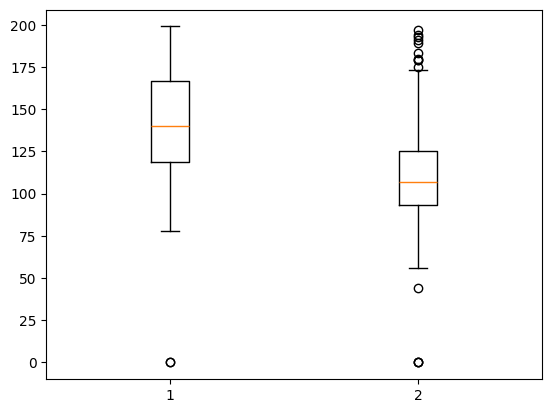

In [55]:
df2 = pd.read_csv("./diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df = pd.read_csv("diabetes.csv")
df3 = df[ df["Outcome"] == 1]
df4 = df[ df["Outcome"] == 0]
plt.boxplot([df3["Glucose"], df4["Glucose"]])
print(df3["Glucose"].describe())
print("*" * 100)
df4["Glucose"].describe(), "sin diabetes"
df.columns

In [56]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


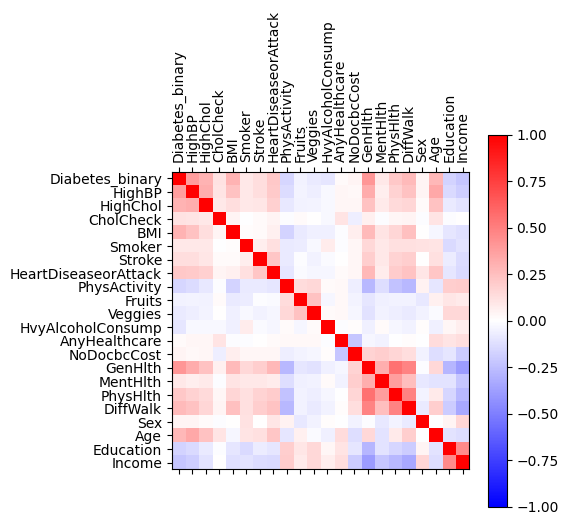

In [57]:
d2 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
mat = d2.corr()
d2.corr().iloc[0,1:]


plt.matshow(mat, cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(22), d2.columns, rotation=90) # mostrar los nombres de las columnas
plt.yticks(range(22), d2.columns) # mostrar los nombres de las columnas
plt.show()


In [58]:
df_dia = pd.read_csv("diabetes.csv")
diabetes_dict = {"diabetes":[],"type_diabete":[]}



for x in df_dia["Glucose"]:
    if(x<=70 or x>=110):
        diabetes_dict["diabetes"].append(1)
    else:
        diabetes_dict["diabetes"].append(0)

    if(x<=25):
        diabetes_dict["type_diabete"].append(1)
    else:
        diabetes_dict["type_diabete"].append(0)

df_dia.assign(10,diabetes_dict)

df_dia


TypeError: DataFrame.assign() takes 1 positional argument but 3 were given